## Import & Read

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# load dataset
df = pd.read_csv('Automobile_data.csv')

In [3]:
# tampilkan 5 data teratas
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Data Cleansing

**Check duplicate**

In [4]:
# cek apakah ada data yang duplicate atau tidak
df.duplicated().any()

False

**Missing Value**

In [5]:
# tampung setiap anam column pada dataset ke dalam variable column dengan tipe data list
columns = list(df.columns)

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
# timpa value ? dengan Nan pada setiap column agar mudah dalam proses deteksi missing value
for column in columns:
    df.loc[df[column]=='?', column] = np.nan

In [8]:
# setiap data value ? sudah berubah menjadi nan
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.4,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.4,8.0,115,5500,18.0,22.0,17450


In [9]:
# fungsi untuk mendeteksi missing value
def missing_data(df):
    md = pd.DataFrame(df.isnull().sum()).reset_index() # variable md adalah dataframe yg digunakan untuk menampung data yang berisi jumlah data null pada setiap column
    md.columns = ['Column', 'Count'] # rename 2 kolom menjadi column dan count
    md = md[md['Count']>0].reset_index(drop=True) # timpa dataframe md dengan data yang hanya memiliki data null saja kemudian hilangkan column index
    md['Percentage'] = round(md['Count']/df.shape[0]*100,2) # menambahkan column percentage pada dataframe percentage
    missing_column = list(md['Column']) # membuat variable missing column untuk menampung semua nama column pada dataframe md
    data_type = [] # membuat variable data type untuk menampung semua tipe data pada dataframe md
    sample = [] # membuat variable sample untuk menampung contoh data pada dataframe md
    for column in missing_column: # looping setiap data pada missing column
        data_type.append(df[column].dtype) # tambahkan tipe data setiap column ke variable data type
        sample.append(df[column][20]) # tambahkan sample data setiap column ke variable sample
    md['Data type'] = data_type # menambahkan column data type pada dataframe md
    md['Sample'] = sample # menambahkan column sample pada dataframe md
    return md

In [10]:
# hilangkan missing value pada column price dikarenakan kolom tersebut akan menjadi target
df = df[~df['price'].isnull()].reset_index(drop=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.4,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.4,8.0,115,5500,18.0,22.0,17450


In [11]:
miss = missing_data(df) # panggil fungsi missing data dan tampung ke dalam variable miss
miss # terdapat 6 column yang memiliki missing value 

,Column,Count,Percentage,Data type,Sample
0,normalized-losses,37,18.41,object,118
1,num-of-doors,2,1.00,object,two
2,bore,4,1.99,object,2.97
3,stroke,4,1.99,object,3.23
4,horsepower,2,1.00,object,68
5,peak-rpm,2,1.00,object,5500


In [12]:
miss_col = list(miss['Column']) # membuat variable miss col yg digunakan untuk menampung semua nama column pada variable miss
miss_col.pop(1) #hapus column num of doors dikarenakam pada column sample menunjukan data text

'num-of-doors'

In [13]:
miss_col #list semua column yang memiliki missing value dengan tipe data angka

['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

In [14]:
# looping semua column dan ubah semua tipe datanya menjadi float
for column in miss_col:
    df[column] = df[column].astype('float')

In [15]:
# hasil dari perubahan tipe data miss col yang sebelumnya object menjadi float
missing_data(df)

,Column,Count,Percentage,Data type,Sample
0,normalized-losses,37,18.41,float64,118.0
1,num-of-doors,2,1.00,object,two
2,bore,4,1.99,float64,2.97
3,stroke,4,1.99,float64,3.23
4,horsepower,2,1.00,float64,68.0
5,peak-rpm,2,1.00,float64,5500.0


**Imputasi data angka dengan Median**

In [16]:
for column in miss_col:
    df[column] = df[column].fillna(df[column].median()) # ubah semua data yang nan menjadi nilai median pada column tersebut

In [17]:
# hasil dari missing data masih menyisakan satu 
# dikarenakan missing data dengan tipe angka sudah disi dengan nilai median sebelumnya
missing_data(df) 

,Column,Count,Percentage,Data type,Sample
0,num-of-doors,2,1.0,object,two


**Imputasi data kategori dengan modus**

In [18]:
# timpa data kosong pada column num of doors menggunakan modus pada column tersebut
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [19]:
# missing data sudah selesai
missing_data(df)

,Column,Count,Percentage,Data type,Sample


## Data Type

In [20]:
df.info()
# column price memiliki tipe data object seharusnya float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    float64
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    float64
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [21]:
# ubah tipe data price menjadi float
df['price'] = df['price'].astype('float')

**Outlier**

<AxesSubplot:xlabel='peak-rpm'>

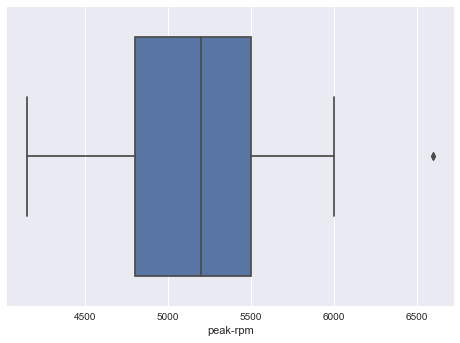

In [22]:
# terdapat outlier salah satunya pada colum peak-rpm
sns.boxplot(df['peak-rpm'])

In [23]:
def outlier_handling(df, column): # membuat fungsi untuk mendeteksi adanya outlier
    q1 = df[column].quantile(0.25) # menghitung nilai q1
    q3 = df[column].quantile(0.75) # menghitung nilai q2
    IQR = q3 - q1 # menghitung nilai iqr
    lower_bound = q1 - 1.5*IQR # menghitung nilai lower bound / ambang bawah
    upper_bound = q3 + 1.5*IQR # menghitung nilai upper bound / ambang atas
    df.loc[df[column]>upper_bound, column] = upper_bound # menimpa value yang melebihi upper bound dengan upper bound itu sendiri

In [24]:
outlier_handling(df, 'peak-rpm') # menghilanglan outlier pada colum peak-rpm

<AxesSubplot:xlabel='peak-rpm'>

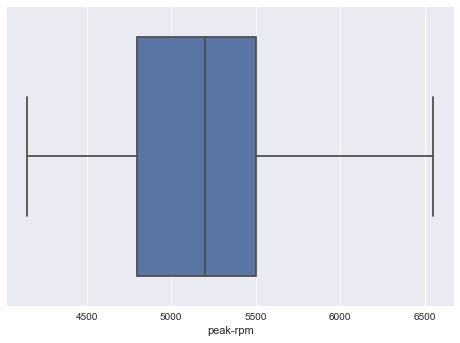

In [25]:
sns.boxplot(df['peak-rpm']) # hasil dari outlier handlind, tidak ada lagi data yang outlier

## EDA

Mencari tau apakah ada korelasi antar data dengan target

In [26]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

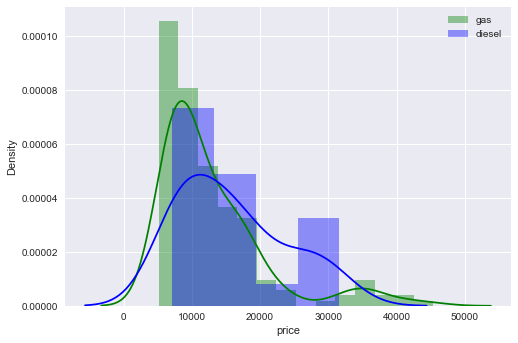

In [27]:
sns.distplot(df[df['fuel-type']=='gas']['price'], color='green', label='gas')
sns.distplot(df[df['fuel-type']=='diesel']['price'], color='blue', label='diesel')
plt.legend()

In [28]:
df[(df['fuel-type']=='gas') & (df['price']>35000)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0.0,115.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209.0,mpfi,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
16,0.0,115.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209.0,mpfi,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0
45,0.0,115.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258.0,mpfi,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,35550.0
46,0.0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326.0,mpfi,3.54,2.76,11.5,262.0,5000.0,13.0,17.0,36000.0
69,3.0,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234.0,mpfi,3.46,3.10,8.3,155.0,4750.0,16.0,18.0,35056.0
70,0.0,115.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308.0,mpfi,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,40960.0
71,1.0,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304.0,mpfi,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,45400.0
125,3.0,115.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194.0,mpfi,3.74,2.90,9.5,207.0,5900.0,17.0,25.0,37028.0


## Data Preparation

In [29]:
df.select_dtypes('object').head() # pilih column yang memiliki tipe data object

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


untuk column num-of-doors dan num-of-cylinders memilik value text namun bermakna angka, maka untuk value pada colum tersebut akan di replace dengan angka saja

**Encode find & replace**

In [30]:
df['num-of-doors'].unique() # cek data unique pada column num of doors

array(['two', 'four'], dtype=object)

In [31]:
df['num-of-cylinders'].unique() # cek data unique pada column num of cylinders

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [32]:
# membuat variable yang berisi column serta value yang ada dan value yang akan menggantikannya
encode_find = {
    'num-of-doors' : {'two':2, 'four':4},
    'num-of-cylinders' : {'four': 4, 'six': 6, 'five':5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
}

In [33]:
df.replace(encode_find,inplace=True) # replace value pada column num of doors dan num of cylinders

In [34]:
df.head() # hasil dari replace value pada column num of doors dan num of cylinders, data berubah menjadi angka

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Untuk column yang memiliki value text namun tidak bermakna angka maka akan dilakukan label encoding dan one-hot encoding

In [35]:
encode_columns = list(df.select_dtypes('object').columns) # pilih semua nama column yang bertipe object dan tampung kedalam variabel encode column
encode_le = [] # membuat variable untuk menampung column yang akan menggunakan label encoding
encode_ohe = [] # membuat variable untuk menampung column yang akan menggunakan one-hot encoding

for column in encode_columns:
    if df[column].nunique() > 2:
        encode_ohe.append(column) # jika data memiliki nilai unique lebih dari 2 maka akan dimasukkan kedalam variabel encode_ohe
    else:
        encode_le.append(column) # jika data memiliki nilai unique kurang dari 2 maka akan dimasukkan kedalam variabel encode_le

In [36]:
# Tampilkan nama column
print(encode_le)
print(encode_ohe)

['fuel-type', 'aspiration', 'engine-location']
['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']


Encode with label encoder

In [37]:
# Process label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in encode_le:
    df[column] =le.fit_transform(df[column])

Encode with one hot encoding

In [38]:
# Process one-hot encoding serta membuat variable baru untuk menampung semua data yang sudah diencoding
df_car = pd.get_dummies(df, columns=encode_ohe)

In [39]:
df_car.head() # hasil dari encoding semua data berubah menjadi angka

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,1,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3.0,115.0,1,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1.0,115.0,1,0,2,0,94.5,171.2,65.5,52.4,...,1,0,0,0,0,0,0,1,0,0
3,2.0,164.0,1,0,4,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,1,0,4,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


## Train Test Split

In [40]:
# memisahkan data independen dan dependen
y = df_car['price'] # data dependen
x = df_car.drop(columns=['price']) # data independe

In [41]:
# pisahkan data train dan test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
# jumlah data setelah dipisahkan antara train dan test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 64)
(41, 64)
(160,)
(41,)


## Model

In [43]:
# import library linear regression
from sklearn.linear_model import LinearRegression

In [44]:
# process modelling
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [45]:
# lakukan prediksi pada model yang sudah dibuat kemudian tampung pada variable y_pred
y_pred = model_lr.predict(x_test)

In [46]:
# hasil dan perbandingan antara data actual dan prediksi
result = pd.DataFrame({'Actual': y_test, 'predict':y_pred}).reset_index(drop=True)
result

,Actual,predict
0,8249.0,8161.461849
1,41315.0,27940.038551
2,6855.0,5957.433285
3,9258.0,7348.275325
4,11850.0,12812.863402
5,5572.0,5683.137088
6,35056.0,36017.057090
7,9988.0,9630.924392
8,15998.0,16759.669993
9,35550.0,32239.485742


<AxesSubplot:>

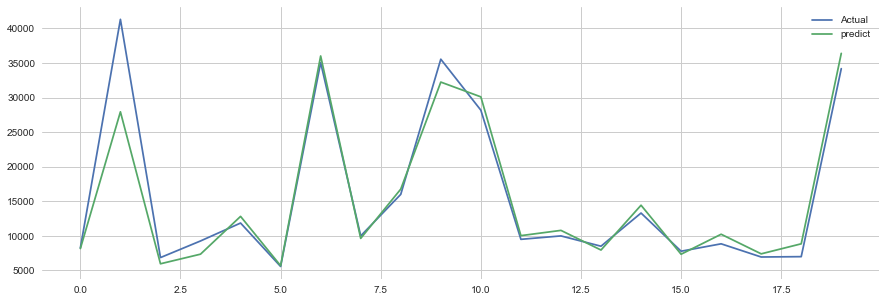

In [64]:
sns.set_style('whitegrid')
result.head(20).plot(kind='line', figsize=(15,5))

Evaluation

In [47]:
# import library untuk evaluation regressi
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
# hasil evaluation
print('---Linear Regression---')
print('MAE :' , mean_absolute_error(y_test,y_pred))
print('RMSE :' , np.sqrt(mean_absolute_error(y_test,y_pred)))

---Linear Regression---
MAE : 1721.9970735355853
RMSE : 41.49695258131114


## Regularization

In [49]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [50]:
# model regularization
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

In [54]:
# modelling
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)
elastic.fit(x_train, y_train)

ElasticNet()

In [56]:
# predict
r_pred = ridge.predict(x_test)
l_pred = lasso.predict(x_test)
e_pred = elastic.predict(x_test)
lr_pred = y_pred

In [67]:
all_pred = pd.DataFrame({
    'Actual' : y_test,
    'Linear Regression' : lr_pred,
    'Ridge' : r_pred,
    'Lasso' : l_pred,
    'Elastic' : e_pred
}).reset_index(drop=True)

In [68]:
all_pred

,Actual,Linear Regression,Ridge,Lasso,Elastic
0,8249.0,8161.461849,8136.279342,8007.380133,7466.346923
1,41315.0,27940.038551,27817.351367,27968.910703,25420.523237
2,6855.0,5957.433285,6663.254982,6064.341052,6762.738964
3,9258.0,7348.275325,6779.654048,7261.299365,6901.765136
4,11850.0,12812.863402,12849.292513,12796.002456,13536.723168
5,5572.0,5683.137088,5620.048215,5649.497813,5605.270900
6,35056.0,36017.057090,32821.309793,35852.788030,26557.145368
7,9988.0,9630.924392,9223.170352,9633.468585,10244.643562
8,15998.0,16759.669993,18802.039417,17074.442972,21322.222516
9,35550.0,32239.485742,30778.116077,32052.413139,30727.879777


<AxesSubplot:>

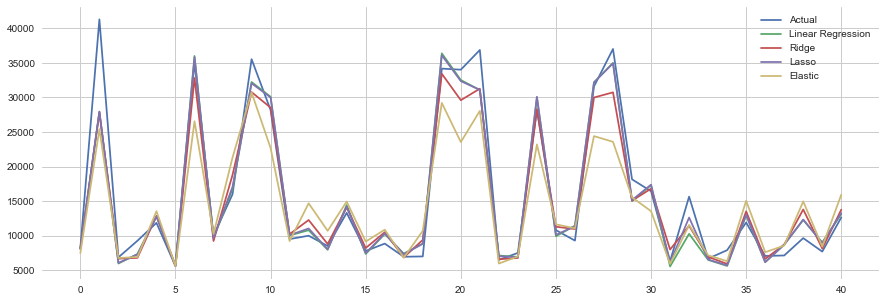

In [69]:
sns.set_style('whitegrid')
all_pred.plot(kind='line', figsize=(15,5))